In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
import pandas as pd
import numpy as np
import sys
import sklearn
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_Train =pd.read_csv('/content/gdrive/My Drive/fs_KDDTrain+.csv')
data_Test = pd.read_csv('/content/gdrive/My Drive/fs_KDDTest+.csv')
data_Validate=pd.read_csv('/content/gdrive/My Drive/fs_new validation project.csv')

In [ ]:
data_Train

,tcp,smtp,SF,1,1.1,0,0.1,1.2,0.2,100,205,0.71,0.03,0.01,0.3,0.4,normal
0,tcp,smtp,SF,1,2,0.00,0.0,0.50,1.00,255,93,0.36,0.24,0.00,0.00,0.00,normal
1,udp,domain_u,SF,0,321,0.00,0.0,1.00,0.01,255,232,0.91,0.01,0.00,0.00,0.00,normal
2,tcp,klogin,S0,0,127,1.00,0.0,0.16,0.06,255,20,0.08,0.06,0.00,1.00,0.00,neptune
3,tcp,daytime,S0,0,167,1.00,0.0,0.09,0.06,255,15,0.06,0.05,0.00,1.00,0.00,neptune
4,tcp,http,SF,1,1,0.00,0.0,1.00,0.00,222,255,1.00,0.00,0.00,0.00,0.03,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130925,tcp,http,SF,1,32,0.03,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.01,0.02,normal
130926,tcp,http,SF,1,8,0.00,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,normal
130927,icmp,ecr_i,SF,0,16,0.00,0.0,1.00,0.00,100,16,0.16,0.04,0.16,0.00,0.00,pod
130928,tcp,http,REJ,0,220,0.00,1.0,0.00,0.07,255,1,0.00,0.07,0.00,0.00,1.00,neptune


In [ ]:
data_Train.columns

Index(['protocol_type', 'service', 'flag', 'logged_in', 'count',
       'srv_serror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'dst_host_rerror_rate', 'attack'],
      dtype='object')

In [ ]:
columns = (['protocol_type',
 'service',
 'flag',
 'logged_in',
 'count',
 'srv_serror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_rerror_rate','attack']
)

In [ ]:
data_Train.columns=columns
data_Test.columns=columns
data_Validate.columns=columns
data_Train

,protocol_type,service,flag,logged_in,count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_rerror_rate,attack
0,tcp,smtp,SF,1,2,0.00,0.0,0.50,1.00,255,93,0.36,0.24,0.00,0.00,0.00,normal
1,udp,domain_u,SF,0,321,0.00,0.0,1.00,0.01,255,232,0.91,0.01,0.00,0.00,0.00,normal
2,tcp,klogin,S0,0,127,1.00,0.0,0.16,0.06,255,20,0.08,0.06,0.00,1.00,0.00,neptune
3,tcp,daytime,S0,0,167,1.00,0.0,0.09,0.06,255,15,0.06,0.05,0.00,1.00,0.00,neptune
4,tcp,http,SF,1,1,0.00,0.0,1.00,0.00,222,255,1.00,0.00,0.00,0.00,0.03,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130925,tcp,http,SF,1,32,0.03,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.01,0.02,normal
130926,tcp,http,SF,1,8,0.00,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,normal
130927,icmp,ecr_i,SF,0,16,0.00,0.0,1.00,0.00,100,16,0.16,0.04,0.16,0.00,0.00,pod
130928,tcp,http,REJ,0,220,0.00,1.0,0.00,0.07,255,1,0.00,0.07,0.00,0.00,1.00,neptune


In [ ]:
data_Train.isnull().sum()
data_Test.isnull().sum()

protocol_type                  0
service                        0
flag                           0
logged_in                      0
count                          0
srv_serror_rate                0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_serror_rate           0
dst_host_rerror_rate           0
attack                         0
dtype: int64

In [ ]:
data_Train['attack'].value_counts()

attack
normal             66085
neptune            40622
satan               4152
ipsweep             3530
smurf               3112
portsweep           2925
nmap                1482
back                1241
guess_passwd        1216
mscan                942
warezmaster          921
teardrop             864
warezclient          832
apache2              708
processtable         645
snmpguess            315
saint                288
mailbomb             280
pod                  231
snmpgetattack        172
httptunnel           130
buffer_overflow       48
land                  23
rootkit               22
multihop              22
named                 16
ps                    14
sendmail              14
xterm                 12
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
worm                   2
sqlattack              2
udpstorm               2
spy               

In [ ]:
data_obj = data_Train.select_dtypes(['object']).columns

In [ ]:
data_Train["attack"].value_counts()

attack
normal             66085
neptune            40622
satan               4152
ipsweep             3530
smurf               3112
portsweep           2925
nmap                1482
back                1241
guess_passwd        1216
mscan                942
warezmaster          921
teardrop             864
warezclient          832
apache2              708
processtable         645
snmpguess            315
saint                288
mailbomb             280
pod                  231
snmpgetattack        172
httptunnel           130
buffer_overflow       48
land                  23
rootkit               22
multihop              22
named                 16
ps                    14
sendmail              14
xterm                 12
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
worm                   2
sqlattack              2
udpstorm               2
spy               

In [ ]:
data_obj

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [ ]:
data_Train['protocol_type'] = protocol_type_le.fit_transform(data_Train['protocol_type'])
data_Train['service'] = service_le.fit_transform(data_Train['service'])
data_Train['flag'] = flag_le.fit_transform(data_Train['flag'])
data_Test['protocol_type'] = protocol_type_le.fit_transform(data_Test['protocol_type'])
data_Test['service'] = service_le.fit_transform(data_Test['service'])
data_Test['flag'] = flag_le.fit_transform(data_Test['flag'])
data_Validate['protocol_type'] = protocol_type_le.fit_transform(data_Validate['protocol_type'])
data_Validate['service'] = service_le.fit_transform(data_Validate['service'])
data_Validate['flag'] = flag_le.fit_transform(data_Validate['flag'])

In [ ]:
data_Test

,protocol_type,service,flag,logged_in,count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_rerror_rate,attack
0,1,19,9,0,2,0.0,0.0,1.0,0.0,191,42,0.21,0.02,0.21,0.0,0.00,normal
1,1,22,9,1,2,0.0,0.0,1.0,0.0,29,255,1.00,0.00,0.03,0.0,0.00,normal
2,1,43,9,1,1,0.0,0.0,1.0,0.0,255,211,0.83,0.02,0.00,0.0,0.04,guess_passwd
3,1,22,9,1,1,0.0,0.0,1.0,0.0,46,255,1.00,0.00,0.02,0.0,0.00,normal
4,1,45,4,0,1,0.0,1.0,1.0,0.0,255,1,0.00,0.89,0.88,0.0,0.90,portsweep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21410,1,22,9,1,4,0.0,0.0,1.0,0.0,255,254,1.00,0.01,0.00,0.0,0.04,back
21411,1,22,9,1,10,0.0,0.0,1.0,0.0,255,255,1.00,0.00,0.00,0.0,0.00,normal
21412,2,45,9,0,2,0.0,0.0,1.0,0.0,255,255,1.00,0.00,0.01,0.0,0.00,snmpguess
21413,1,22,9,1,4,0.0,0.0,1.0,0.0,21,255,1.00,0.00,0.05,0.0,0.00,normal


In [ ]:
df_train=data_Train.copy(deep=True)
df_test=data_Test.copy(deep=True)
df_validate=data_Validate.copy(deep=True)

In [ ]:
l1=[0,1,1,1,1]
tdf=df_train['attack']
nwdf=tdf.replace({ 'normal' : l1[0], 'neptune' : l1[1] ,'back': l1[1], 'land': l1[1], 'pod': l1[1], 'smurf': l1[1], 'teardrop': l1[1],'mailbomb': l1[1], 'apacl1[1]he2': l1[1], 'processtable': l1[1], 'udpstorm': l1[1], 'worm': l1[1],
                           'ipsweep' : l1[2],'nmap' : l1[2],'portsweep' : l1[2],'satan' : l1[2],'mscan' : l1[2],'saint' : l1[2]
                           ,'ftp_write': l1[3],'guess_passwd':l1[3],'imap': l1[3],'multihop': l1[3],'phf': l1[3],'spy': l1[3],'warezclient': l1[3],'warezmaster': l1[3],'sendmail': l1[3],'named': l1[3],'snmpgetattack': l1[3],'snmpguess': l1[3],'xlock': l1[3],'xsnoop': l1[3],'httptunnel': l1[3],
                           'buffer_overflow': l1[4],'loadmodule': l1[4],'perl': l1[4],'rootkit': l1[4],'ps': l1[4],'sqlattack': l1[4],'xterm': l1[4],
                 'mscan':l1[2], 'udpstorm':l1[1], 'xterm':l1[3], 'worm':l1[1], 'saint':l1[2], 'snmpgetattack':l1[4], 'named':l1[4], 'mailbomb':l1[4], 'apache2':l1[1], 'httptunnel':l1[4], 'ps':l1[3], 'xsnoop':l1[4], 'processtable':l1[1], 'sendmail':l1[4], 'snmpguess':l1[4], 'sqlattack':l1[3], 'xlock':l1[4]})
df_train['attack']=nwdf
l1=[0,1,1,1,1]
tdf=df_test['attack']
nwdf=tdf.replace({ 'normal' : l1[0], 'neptune' : l1[1] ,'back': l1[1], 'land': l1[1], 'pod': l1[1], 'smurf': l1[1], 'teardrop': l1[1],'mailbomb': l1[1], 'apacl1[1]he2': l1[1], 'processtable': l1[1], 'udpstorm': l1[1], 'worm': l1[1],
                           'ipsweep' : l1[2],'nmap' : l1[2],'portsweep' : l1[2],'satan' : l1[2],'mscan' : l1[2],'saint' : l1[2]
                           ,'ftp_write': l1[3],'guess_passwd':l1[3],'imap': l1[3],'multihop': l1[3],'phf': l1[3],'spy': l1[3],'warezclient': l1[3],'warezmaster': l1[3],'sendmail': l1[3],'named': l1[3],'snmpgetattack': l1[3],'snmpguess': 3,'xlock': l1[3],'xsnoop': l1[3],'httptunnel': l1[3],
                           'buffer_overflow': l1[4],'loadmodule': l1[4],'perl': l1[4],'rootkit': l1[4],'ps': l1[4],'sqlattack': l1[4],'xterm': l1[4],
                 'mscan':l1[2], 'udpstorm':l1[1], 'xterm':l1[3], 'worm':l1[1], 'saint':l1[2], 'snmpgetattack':l1[4], 'named':l1[4], 'mailbomb':l1[4], 'apache2':l1[1], 'httptunnel':l1[4], 'ps':l1[3], 'xsnoop':l1[4], 'processtable':l1[1], 'sendmail':l1[4], 'snmpguess':l1[4], 'sqlattack':l1[3], 'xlock':l1[4]})
df_test['attack']=nwdf

l1=[0,1,1,1,1]
tdf=df_validate['attack']
nwdf=tdf.replace({ 'normal' : l1[0], 'neptune' : l1[1] ,'back': l1[1], 'land': l1[1], 'pod': l1[1], 'smurf': l1[1], 'teardrop': l1[1],'mailbomb': l1[1], 'apacl1[1]he2': l1[1], 'processtable': l1[1], 'udpstorm': l1[1], 'worm': l1[1],
                           'ipsweep' : l1[2],'nmap' : l1[2],'portsweep' : l1[2],'satan' : l1[2],'mscan' : l1[2],'saint' : l1[2]
                           ,'ftp_write': l1[3],'guess_passwd':l1[3],'imap': l1[3],'multihop': l1[3],'phf': l1[3],'spy': l1[3],'warezclient': l1[3],'warezmaster': l1[3],'sendmail': l1[3],'named': l1[3],'snmpgetattack': l1[3],'snmpguess': 3,'xlock': l1[3],'xsnoop': l1[3],'httptunnel': l1[3],
                           'buffer_overflow': l1[4],'loadmodule': l1[4],'perl': l1[4],'rootkit': l1[4],'ps': l1[4],'sqlattack': l1[4],'xterm': l1[4],
                 'mscan':l1[2], 'udpstorm':l1[1], 'xterm':l1[3], 'worm':l1[1], 'saint':l1[2], 'snmpgetattack':l1[4], 'named':l1[4], 'mailbomb':l1[4], 'apache2':l1[1], 'httptunnel':l1[4], 'ps':l1[3], 'xsnoop':l1[4], 'processtable':l1[1], 'sendmail':l1[4], 'snmpguess':l1[4], 'sqlattack':l1[3], 'xlock':l1[4]})
df_validate['attack']=nwdf

In [ ]:
x_train=df_train.drop(['attack'],axis=1)
y_train=pd.DataFrame(df_train['attack'].copy())
x_test=df_test.drop(['attack'],axis=1)
y_test=pd.DataFrame(df_test['attack'].copy())
x_validate=df_validate.drop(['attack'],axis=1)
y_validate=pd.DataFrame(df_validate['attack'].copy())
x_train.head()
y_train.head()
x_train

,protocol_type,service,flag,logged_in,count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_rerror_rate
0,1,54,9,1,2,0.00,0.0,0.50,1.00,255,93,0.36,0.24,0.00,0.00,0.00
1,2,12,9,0,321,0.00,0.0,1.00,0.01,255,232,0.91,0.01,0.00,0.00,0.00
2,1,30,5,0,127,1.00,0.0,0.16,0.06,255,20,0.08,0.06,0.00,1.00,0.00
3,1,9,5,0,167,1.00,0.0,0.09,0.06,255,15,0.06,0.05,0.00,1.00,0.00
4,1,24,9,1,1,0.00,0.0,1.00,0.00,222,255,1.00,0.00,0.00,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130925,1,24,9,1,32,0.03,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.01,0.02
130926,1,24,9,1,8,0.00,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00
130927,0,15,9,0,16,0.00,0.0,1.00,0.00,100,16,0.16,0.04,0.16,0.00,0.00
130928,1,24,1,0,220,0.00,1.0,0.00,0.07,255,1,0.00,0.07,0.00,0.00,1.00


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

label_encoder = LabelEncoder()
scaler=MinMaxScaler()

x1=x_train.copy(deep=True)

scaler=MinMaxScaler()
scaler.fit(x1)
scaled_data=scaler.transform(x1)
scaled_data=pd.DataFrame(scaled_data)
scaled_data.columns= x1.columns
x_train=scaled_data

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

label_encoder = LabelEncoder()
scaler=MinMaxScaler()
x1=x_test.copy(deep=True)
scaler=MinMaxScaler()
scaler.fit(x1)
scaled_data=scaler.transform(x1)
scaled_data=pd.DataFrame(scaled_data)
scaled_data.columns= x1.columns
x_test=scaled_data

In [ ]:
x_train

,protocol_type,service,flag,logged_in,count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_rerror_rate
0,0.5,0.782609,0.9,1.0,0.003914,0.00,0.0,0.50,1.00,1.000000,0.364706,0.36,0.24,0.00,0.00,0.00
1,1.0,0.173913,0.9,0.0,0.628180,0.00,0.0,1.00,0.01,1.000000,0.909804,0.91,0.01,0.00,0.00,0.00
2,0.5,0.434783,0.5,0.0,0.248532,1.00,0.0,0.16,0.06,1.000000,0.078431,0.08,0.06,0.00,1.00,0.00
3,0.5,0.130435,0.5,0.0,0.326810,1.00,0.0,0.09,0.06,1.000000,0.058824,0.06,0.05,0.00,1.00,0.00
4,0.5,0.347826,0.9,1.0,0.001957,0.00,0.0,1.00,0.00,0.870588,1.000000,1.00,0.00,0.00,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130925,0.5,0.347826,0.9,1.0,0.062622,0.03,0.0,1.00,0.00,1.000000,1.000000,1.00,0.00,0.00,0.01,0.02
130926,0.5,0.347826,0.9,1.0,0.015656,0.00,0.0,1.00,0.00,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00
130927,0.0,0.217391,0.9,0.0,0.031311,0.00,0.0,1.00,0.00,0.392157,0.062745,0.16,0.04,0.16,0.00,0.00
130928,0.5,0.347826,0.1,0.0,0.430528,0.00,1.0,0.00,0.07,1.000000,0.003922,0.00,0.07,0.00,0.00,1.00


In [ ]:
y_test

,attack
0,0
1,0
2,1
3,0
4,1
...,...
21410,1
21411,0
21412,1
21413,0


In [ ]:
x_train=df_train.iloc[:,0:16]
x_test=df_test.iloc[:,0:16]

In [ ]:
x_train

,protocol_type,service,flag,logged_in,count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_rerror_rate
0,1,54,9,1,2,0.00,0.0,0.50,1.00,255,93,0.36,0.24,0.00,0.00,0.00
1,2,12,9,0,321,0.00,0.0,1.00,0.01,255,232,0.91,0.01,0.00,0.00,0.00
2,1,30,5,0,127,1.00,0.0,0.16,0.06,255,20,0.08,0.06,0.00,1.00,0.00
3,1,9,5,0,167,1.00,0.0,0.09,0.06,255,15,0.06,0.05,0.00,1.00,0.00
4,1,24,9,1,1,0.00,0.0,1.00,0.00,222,255,1.00,0.00,0.00,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130925,1,24,9,1,32,0.03,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.01,0.02
130926,1,24,9,1,8,0.00,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00
130927,0,15,9,0,16,0.00,0.0,1.00,0.00,100,16,0.16,0.04,0.16,0.00,0.00
130928,1,24,1,0,220,0.00,1.0,0.00,0.07,255,1,0.00,0.07,0.00,0.00,1.00


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x_train)
x_train = scaler.transform(x_train)
np.set_printoptions(precision=3)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x_test)
x_test = scaler.transform(x_test)
np.set_printoptions(precision=3)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import Sequential
#from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.layers import LSTM,Embedding,SpatialDropout1D,Bidirectional,Activation
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
#LSTM
model = Sequential()
model.add(LSTM(64,input_dim=(16), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 64)          20736     
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          33024     
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                3

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
2046/2046 [==============================] - 28s 10ms/step - loss: 0.3137 - accuracy: 0.8652
Epoch 2/5
2046/2046 [==============================] - 21s 10ms/step - loss: 0.2370 - accuracy: 0.9018
Epoch 3/5
2046/2046 [==============================] - 20s 10ms/step - loss: 0.2150 - accuracy: 0.9129
Epoch 4/5
2046/2046 [==============================] - 20s 10ms/step - loss: 0.1901 - accuracy: 0.9244
Epoch 5/5
2046/2046 [==============================] - 21s 10ms/step - loss: 0.1724 - accuracy: 0.9328


In [ ]:
path = '/content/gdrive/My Drive/latest_cnn_bin.h5'
cnn=tf.keras.models.load_model(path)

In [ ]:
predict_x=cnn.predict(x_test)

670/670 [==============================] - 4s 5ms/step


In [ ]:
l=[]
l1=[]
for i in predict_x:
    te=[]
    for j in i:
        te.append(round(j))
    l.append(te)
t=np.array(l)

l=[]
for i in y_test.values:
    l.append(i)
t1=np.array(l)
print(t)

[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]


In [ ]:
from sklearn.metrics import f1_score, classification_report, multilabel_confusion_matrix

# Calculate the f1 score
f1_score = f1_score(t1, t, average='micro')

# Print the f1 score
print('f1 score of lstm binary class:\n')
print(f1_score)

# Calculate the classification report
classification_report = classification_report(t1, t)

# Print the classification report
print('classification report of lstm binary class:\n')
print(classification_report)

# Calculate the confusion matrix
confusion_matrix = multilabel_confusion_matrix(t1, t)
classes = ["not attack", "attack"]
# Print the confusion matrix for each class
for i, class_name in enumerate(classes):
    print(f"Confusion matrix for class {class_name}:")
    print(confusion_matrix[i])

f1 score of lstm binary class:

0.9582535605883726
classification report of lstm binary class:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9217
           1       0.97      0.96      0.96     12198

    accuracy                           0.96     21415
   macro avg       0.96      0.96      0.96     21415
weighted avg       0.96      0.96      0.96     21415

Confusion matrix for class not attack:
[[11660   538]
 [  356  8861]]
Confusion matrix for class attack:
[[ 8861   356]
 [  538 11660]]


In [ ]:
x_train.shape

(130930, 1, 16)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
#CNN
cnn = Sequential()
cnn.add(Conv1D(64, 3,activation="relu",input_shape=(16,1)))
cnn.add(Conv1D(64, 3, activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Conv1D(128, 3, activation="relu"))
cnn.add(Conv1D(128, 3, activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="sigmoid"))

In [ ]:
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 14, 64)            256       
                                                                 
 conv1d_5 (Conv1D)           (None, 12, 64)            12352     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 4, 128)            24704     
                                                                 
 conv1d_7 (Conv1D)           (None, 2, 128)            49280     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                 

In [ ]:
cnn.fit(x_train, y_train, batch_size=32, epochs=5,validation_data=(x_train,y_train))

Epoch 1/5
4092/4092 [==============================] - 56s 13ms/step - loss: 0.2130 - accuracy: 0.9142 - val_loss: 0.1794 - val_accuracy: 0.9243
Epoch 2/5
4092/4092 [==============================] - 52s 13ms/step - loss: 0.1572 - accuracy: 0.9359 - val_loss: 0.1297 - val_accuracy: 0.9486
Epoch 3/5
4092/4092 [==============================] - 42s 10ms/step - loss: 0.1266 - accuracy: 0.9496 - val_loss: 0.1090 - val_accuracy: 0.9575
Epoch 4/5
4092/4092 [==============================] - 44s 11ms/step - loss: 0.1094 - accuracy: 0.9569 - val_loss: 0.1050 - val_accuracy: 0.9576
Epoch 5/5
4092/4092 [==============================] - 52s 13ms/step - loss: 0.1003 - accuracy: 0.9617 - val_loss: 0.0883 - val_accuracy: 0.9660


In [ ]:
predict_x=cnn.predict(x_test)

670/670 [==============================] - 2s 3ms/step


In [ ]:
predict_x

array([[1.486e-08, 9.639e-01, 3.093e-07, 1.315e-03, 3.481e-02],
       [2.821e-23, 1.000e+00, 2.738e-25, 0.000e+00, 7.131e-19],
       [3.442e-07, 2.960e-04, 1.377e-09, 3.878e-07, 9.997e-01],
       ...,
       [1.776e-05, 6.223e-01, 3.372e-06, 3.777e-01, 1.497e-06],
       [3.699e-26, 1.000e+00, 1.009e-30, 0.000e+00, 2.813e-26],
       [8.853e-06, 8.840e-01, 4.360e-06, 1.150e-01, 1.013e-03]],
      dtype=float32)

In [ ]:
#predict_x=pnn.predict(x_test)
l=[]
l1=[]
for i in predict_x:
    te=[]
    for j in i:
        te.append(round(j))
    l.append(te)
t=np.array(l)
l=[]
for i in y_test.values:
    l.append(i)
t1=np.array(l)
print(t1)
print(t1.shape)
print(t.shape)

[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]
(21415, 1)
(21415, 1)


In [ ]:
from sklearn.metrics import f1_score, classification_report, multilabel_confusion_matrix

# Calculate the f1 score
f1_score = f1_score(t1, t, average='micro')

# Print the f1 score
print('f1 score of cnn binary class:\n')
print(f1_score)

# Calculate the classification report
classification_report = classification_report(t1, t)

# Print the classification report
print('classification report of cnn binary class:\n')
print(classification_report)

# Calculate the confusion matrix
confusion_matrix = multilabel_confusion_matrix(t1, t)
classes = ["not attack", "attack"]
# Print the confusion matrix for each class
for i, class_name in enumerate(classes):
    print(f"Confusion matrix for class {class_name}:")
    print(confusion_matrix[i])

f1 score of cnn binary class:

0.9206163903805744
classification report of cnn binary class:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      9217
           1       0.96      0.90      0.93     12198

    accuracy                           0.92     21415
   macro avg       0.92      0.92      0.92     21415
weighted avg       0.92      0.92      0.92     21415

Confusion matrix for class not attack:
[[10990  1208]
 [  492  8725]]
Confusion matrix for class attack:
[[ 8725   492]
 [ 1208 10990]]


In [ ]:
import tensorflow as tf
path = '/content/gdrive/My Drive/latest_cnn_multiclass.h5'
cnn.save(path)

705/705 [==============================] - 4s 3ms/step


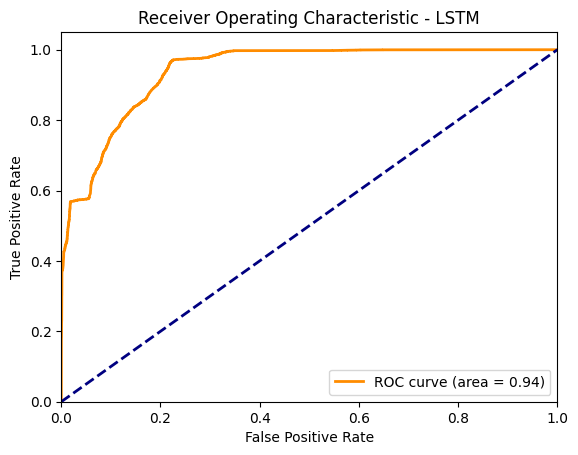

In [ ]:
# Plot ROC curve for LSTM
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Reshape the input data to match the expected shape for LSTM
x_test_reshaped = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

# Generate predictions using the reshaped input data
predict_lstm = model.predict(x_test_reshaped)

# Flatten the predictions
predict_lstm = predict_lstm.ravel()

# Compute the ROC curve and AUC
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, predict_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lstm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LSTM')
plt.legend(loc="lower right")
plt.show()



705/705 [==============================] - 2s 2ms/step


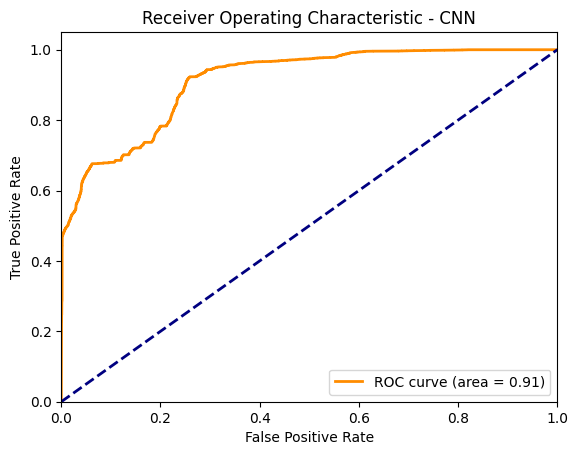

In [ ]:
# Plot ROC curve for CNN
predict_cnn = cnn.predict(x_test).ravel()  # Flatten the array
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, predict_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure()
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CNN')
plt.legend(loc="lower right")
plt.show()